In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_train = pd.read_csv('input/train.csv')

In [3]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
# remove missing data

total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum() / df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data = missing_data[missing_data['Total'] > 0]
missing_data

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [5]:
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index, 1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max()

0

In [6]:
# removing outliers

df_train.sort_values(by='GrLivArea', ascending=False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

In [7]:
# make saleprice, grlivarea, and totalbsmtsf normally distributed

df_train['SalePrice'] = np.log(df_train['SalePrice'])

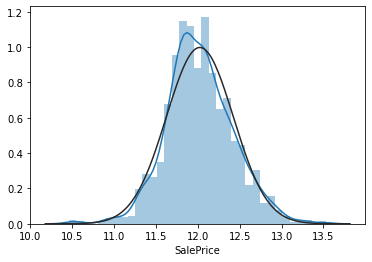

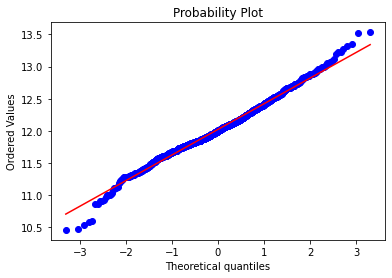

In [8]:
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

In [9]:
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

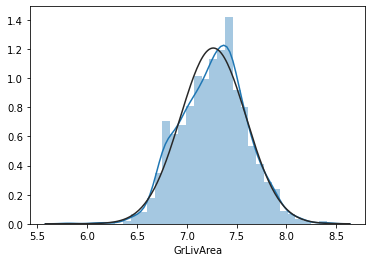

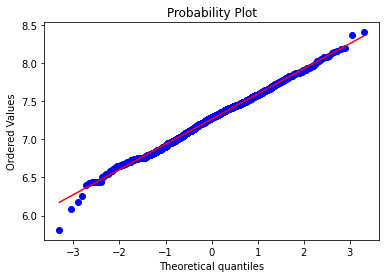

In [10]:
sns.distplot(df_train['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [11]:
df_train['HasBsmt'] = (df_train['TotalBsmtSF'] > 0).astype(int)
df_train.loc[df_train['HasBsmt'] == 1, 'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

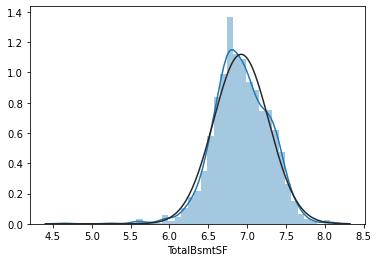

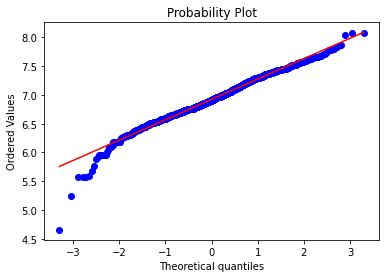

In [12]:
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

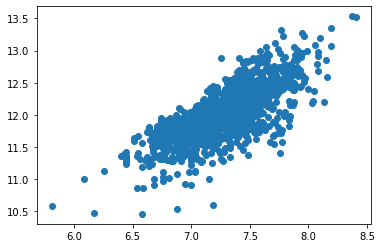

In [13]:
# check for homoscedasticity ("width" of the scatter plot doesn't change depending on the independent variable)
# (ie. no cones, no diamonds)

plt.scatter(df_train['GrLivArea'], df_train['SalePrice'])

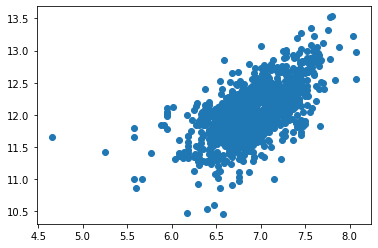

In [14]:
plt.scatter(df_train[df_train['HasBsmt'] == 1]['TotalBsmtSF'], df_train[df_train['HasBsmt'] == 1]['SalePrice'])

In [15]:
# todo: drop some irrelevant features
#df_train = df_train.drop('Id', axis=1)
#df_train = df_train.drop('HasBsmt', axis=1)

In [16]:
# run machine learning algorithms and make predictions

# linear regression
# features are independent: check
# standardize the features
# - we gonna skip standardizing one-hot features: https://datascience.stackexchange.com/q/31652/44632
# - although it could benefit us a little, they're already within [0, 1] range
numeric_colnames = df_train.dtypes[df_train.dtypes != object].index
display(df_train[numeric_colnames])

y = df_train['SalePrice']
y_mean, y_stdev = np.mean(y), np.std(y)

print("SalePrice mean: ", y_mean, "stdev: ", y_stdev)

df_train[numeric_colnames] = StandardScaler().fit_transform(df_train[numeric_colnames])
display(df_train[numeric_colnames])

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,HasBsmt
0,1,60,8450,7,5,2003,2003,706,0,150,...,61,0,0,0,0,0,2,2008,12.247694,1
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,0,0,0,5,2007,12.109011,1
2,3,60,11250,7,5,2001,2002,486,0,434,...,42,0,0,0,0,0,9,2008,12.317167,1
3,4,70,9550,7,5,1915,1970,216,0,540,...,35,272,0,0,0,0,2,2006,11.849398,1
4,5,60,14260,8,5,2000,2000,655,0,490,...,84,0,0,0,0,0,12,2008,12.429216,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,40,0,0,0,0,0,8,2007,12.072541,1
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,0,0,0,0,0,0,2,2010,12.254863,1
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,60,0,0,0,0,2500,5,2010,12.493130,1
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,0,112,0,0,0,0,4,2010,11.864462,1


SalePrice mean:  12.024005414589174 stdev:  0.3997154049992229


,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,HasBsmt
0,-1.730072,0.073783,-0.203915,0.657877,-0.517875,1.053869,0.881146,0.616593,-0.288975,-0.943811,...,0.225457,-0.359742,-0.116461,-0.270507,-0.063731,-0.087779,-1.601497,0.138424,0.559620,0.16142
1,-1.727698,-0.871283,-0.087272,-0.068830,2.176923,0.159237,-0.427401,1.245035,-0.288975,-0.640686,...,-0.708669,-0.359742,-0.116461,-0.270507,-0.063731,-0.087779,-0.490363,-0.614126,0.212665,0.16142
2,-1.725324,0.073783,0.080084,0.657877,-0.517875,0.987600,0.832681,0.108295,-0.288975,-0.301366,...,-0.065500,-0.359742,-0.116461,-0.270507,-0.063731,-0.087779,0.991149,0.138424,0.733425,0.16142
3,-1.722950,0.310049,-0.092344,0.657877,-0.517875,-1.861970,-0.718189,-0.515527,-0.288975,-0.061581,...,-0.172695,4.088121,-0.116461,-0.270507,-0.063731,-0.087779,-1.601497,-1.366675,-0.436830,0.16142
4,-1.720576,0.073783,0.385384,1.384584,-0.517875,0.954466,0.735752,0.498760,-0.288975,-0.174687,...,0.577668,-0.359742,-0.116461,-0.270507,-0.063731,-0.087779,2.102283,0.138424,1.013748,0.16142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.723872,0.073783,-0.257976,-0.068830,-0.517875,0.921331,0.735752,-1.014584,-0.288975,0.872679,...,-0.096127,-0.359742,-0.116461,-0.270507,-0.063731,-0.087779,0.620771,-0.614126,0.121426,0.16142
1456,1.726246,-0.871283,0.275334,-0.068830,0.380391,0.225506,0.154176,0.810671,0.720838,0.049264,...,-0.708669,-0.359742,-0.116461,-0.270507,-0.063731,-0.087779,-1.601497,1.643522,0.577554,0.16142
1457,1.728620,0.310049,-0.143869,0.657877,3.075189,-1.000472,1.026540,-0.379210,-0.288975,0.700757,...,0.210143,-0.359742,-0.116461,-0.270507,-0.063731,4.947879,-0.490363,1.643522,1.173645,0.16142
1458,1.730994,-0.871283,-0.075405,-0.795537,0.380391,-0.702261,0.541893,-0.901372,6.085854,-1.283131,...,-0.708669,1.471731,-0.116461,-0.270507,-0.063731,-0.087779,-0.860741,1.643522,-0.399142,0.16142


In [17]:
# one-hot encode categorical variables
display(df_train.columns)
df_train = pd.get_dummies(df_train)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice', 'HasBsmt'],
      dtype='object')

In [18]:
# separate the labels

X_train, y_train = df_train.drop('SalePrice', axis=1), df_train['SalePrice']

In [25]:
# run linear regression

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_train)
predictions

array([ 0.56344604,  0.34024048,  0.61190796, ...,  1.41494751,
       -0.47457886, -0.2538147 ])

In [26]:
# outptut rmse of predictions

from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_train, predictions))
print("RMSE: ", rmse)
print("Denormalized RMSE: ", (y_stdev * rmse)) # on average, we're off by a factor of e^(0.009...)

def orig(yy):
    return np.exp((y_stdev * yy) + y_mean)

y_train_orig = orig(y_train)
predictions_orig = pd.Series(orig(predictions))

display(y_train_orig)
display(predictions_orig)

to_dump = pd.concat([y_train_orig.rename('Labels'), predictions_orig.rename('Predictions')], axis=1)
to_dump.to_csv('predictions.csv', index=False)

RMSE:  0.2333009214574941
Denormalized RMSE:  0.09325397230707415


0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1457, dtype: float64

0       208819.073423
1       190995.429086
2       212903.534458
3       165305.732196
4       287608.906778
            ...      
1452    178815.407485
1453    208676.476283
1454    293484.977076
1455    137903.429700
1456    150625.480020
Length: 1457, dtype: float64

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   1.,   1.,   0.,   1.,   5.,   2.,   3.,   6.,
          3.,   2.,   6.,   5.,   9.,   6.,  19.,  25.,  20.,  23.,  28.,
         39.,  58.,  52.,  77.,  57.,  80.,  68.,  94., 124.,  87.,  83.,
         84.,  71.,  46.,  35.,  35.,  43.,  30.,  14.,  24.,  14.,  11.,
         12.,   8.,  10.,   3.,   6.,   3.,   2.,   5.,   0.,   2.,   0.,
          0.,   1.,   0.,   3.,   1.,   0.,   0.,   1.,   0.,   1.,   1.,
          1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,
          1.]),
 array([-1.17473124, -1.14633848, -1.11794572, -1.08955296, -1.0611602 ,
        -1.03276744, -1.00437468, -0.97598192, -0.94758915, -0.91919639,
        -0.89080363, -0.86241087, -0.83401811, -0.80562535, -0.77723259,
        -0.74883983, -0.72044707, -0.69205431, -0.66366155, -0.63526879,
        -0.60687603, -0.57

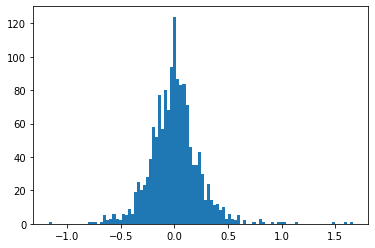

In [27]:
# confused; most predictions aren't that bad?
diffs = predictions - y_train
n_bins = 100
#bins = (np.array(range(n_bins)) * 0.5) - 1.5
#plt.xticks(bins)
plt.hist(diffs, bins=n_bins)

In [40]:
# run svr

from sklearn.svm import SVR

model = SVR(C=100, epsilon=0.01)
model.fit(X_train, y_train)
predictions = model.predict(X_train)
predictions

rmse = np.sqrt(mean_squared_error(y_train, predictions))
print("RMSE: ", rmse)
print("Denormalized RMSE: ", (y_stdev * rmse)) # on average, we're off by a factor of e^(0.004...). overfitting?

RMSE:  0.010020138123687329
Denormalized RMSE:  0.004005203568257835


In [45]:
# run sgdregressor

from sklearn.linear_model import SGDRegressor

model = SGDRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_train)
predictions

rmse = np.sqrt(mean_squared_error(y_train, predictions))
print("RMSE: ", rmse)
print("Denormalized RMSE: ", (y_stdev * rmse))

RMSE:  0.2635996579684318
Denormalized RMSE:  0.10536484404250837
